In [1]:
from myBdd import *

In [2]:
f = boolfunc.Expression(
    r"input\1.pcn")
print(f)

4
3
3 1 2 3
2 -2 4
2 -3 4


In [3]:
ordering = [2,3,1,4]
print(ordering)
a = BDD(f, ordering)
a

[2, 3, 1, 4]


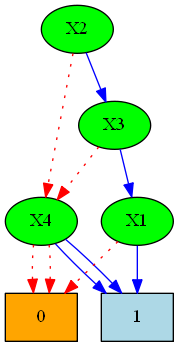

In [4]:
a.displayGraph()

In [5]:
a.node

id:2090075342688
var:2
exp:4
3
3 1 2 3
2 -2 4
2 -3 4
lo:2090075343168
hi:2090075343168

In [6]:
a.node.getLabel()

'X2'

In [7]:
import pydot
G = pydot.Dot(graph_type="digraph")
node = pydot.Node(a.node.getLabel(),style="filled",fillcolor="green")
G.add_node(node)
node = pydot.Node(a.node.lo.getLabel(),style="filled",fillcolor="green")
G.add_node(node)
node = pydot.Node(a.node.hi.getLabel(),style="filled",fillcolor="green")
G.add_node(node)

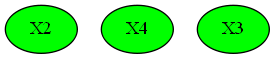

In [8]:
from IPython.display import Image, display
img = Image(G.create_png())
display(img)

In [9]:
e1 = pydot.Edge(a.node.getLabel(), a.node.lo.getLabel(), color='red',style='dotted')
G.add_edge(e1)
e2 = pydot.Edge(a.node.getLabel(), a.node.hi.getLabel(), color='blue')
G.add_edge(e2)

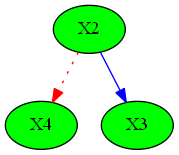

In [10]:
from IPython.display import Image, display
img = Image(G.create_png())
display(img)